In [2]:
# Import files
from sqlite_db import *
import sqlite3
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

C:\Users\david\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
connection = sqlite3.connect("david_data.db")
data= get_table(connection, "articles")
display("data:" ,data)
df = pd.DataFrame(data)

'data:'

[{'id': '19537',
  'headline': 'Gewonde bij ongeluk Achterveld',
  'dateTime': '2024-11-18 00:00:00',
  'alltext': "07.15 uur: Gewonde bij ongeluk Achterveld\nOp de Achterveldseweg zijn vanochtend twee auto's met elkaar in botsing gekomen. Een van de bestuurders is naar het ziekenhuis afgevoerd, meldt een aanwezige fotograaf. De weg is voor enige tijd dicht zodat er opgeruimd kan worden.",
  'sitename': 'rtvutrecht.nl',
  'url': 'https://www.rtvutrecht.nl/nieuws/3815675/112-nieuws-lange-files-door-ongelukken-a28-en-a1-portiekbrandje-in-amersfoort',
  'countryid': 'NL',
  'dataOrigin': 'roaddanger',
  'version': 1},
 {'id': '19538',
  'headline': 'Verkeerschaos rond Amersfoort na gekantelde vrachtwagen op A28',
  'dateTime': '2024-11-18 00:00:00',
  'alltext': 'Op de A28 bij Hoevelaken is vanochtend een vrachtwagen gekanteld na een aanrijding. Zowel de hoofdrijbaan als de parallelbaan is voorlopig dicht, verkeer vanaf Utrecht richting Amersfoort wordt omgeleid via de A27 en de A1.\n\nAm

In [4]:
df.head()

,id,headline,dateTime,alltext,sitename,url,countryid,dataOrigin,version
0,19537,Gewonde bij ongeluk Achterveld,2024-11-18 00:00:00,07.15 uur: Gewonde bij ongeluk Achterveld\nOp ...,rtvutrecht.nl,https://www.rtvutrecht.nl/nieuws/3815675/112-n...,NL,roaddanger,1
1,19538,Verkeerschaos rond Amersfoort na gekantelde vr...,2024-11-18 00:00:00,Op de A28 bij Hoevelaken is vanochtend een vra...,rtvutrecht.nl,https://www.rtvutrecht.nl/nieuws/3815681/verke...,NL,roaddanger,1
2,19539,Ravage na botsing tussen bestelbus en auto op ...,2024-11-18 00:00:00,Een bestelbus en een auto zijn maandagochtend ...,gelderlander.nl,https://www.gelderlander.nl/barneveld/ravage-n...,NL,roaddanger,1
3,19540,Fietser (37) overlijdt in Zwolle na aanrijding...,2024-11-18 00:00:00,Een ongeluk met dodelijke afloop in Zwolle. Ee...,destentor.nl,https://www.destentor.nl/112-nieuws-zwolle/fie...,NL,roaddanger,1
4,19510,Automobilist belandt in sloot langs A7 bij Hee...,2024-11-17 00:00:00,Een automobilist is afgelopen nacht gewond ger...,www.ad.nl,https://www.ad.nl/112-nieuws-heerenveen/automo...,NL,roaddanger,1


Number of rows: 18875
Got articles from coutries: ['NL' 'DE' 'UN' 'BE' 'AU' 'GB' 'FR' 'US' 'ES' 'CH' 'PT' 'IL']


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


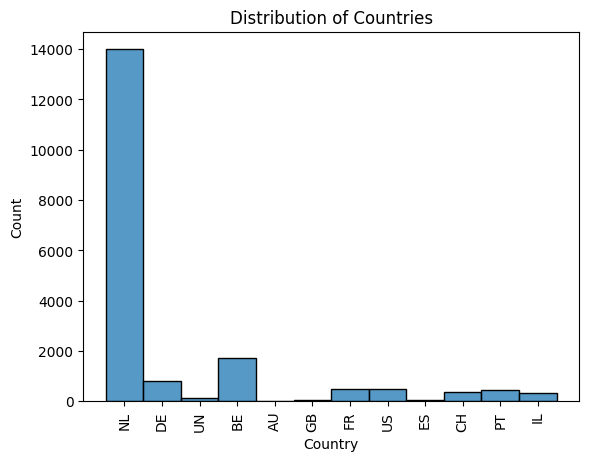

In [5]:
#print(df.head())
print(f"Number of rows: {df.shape[0]}")

# Print different coutrys
print(f"Got articles from coutries: {df['countryid'].unique()}")

# Create a histogram of the 'country' column
sns.histplot(df['countryid'], kde=False, discrete=True)
# Set the y-axis to a logarithmic scale
#plt.yscale('log')
# Display the plot
plt.title("Distribution of Countries")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=90)  # Rotate country labels for readability
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


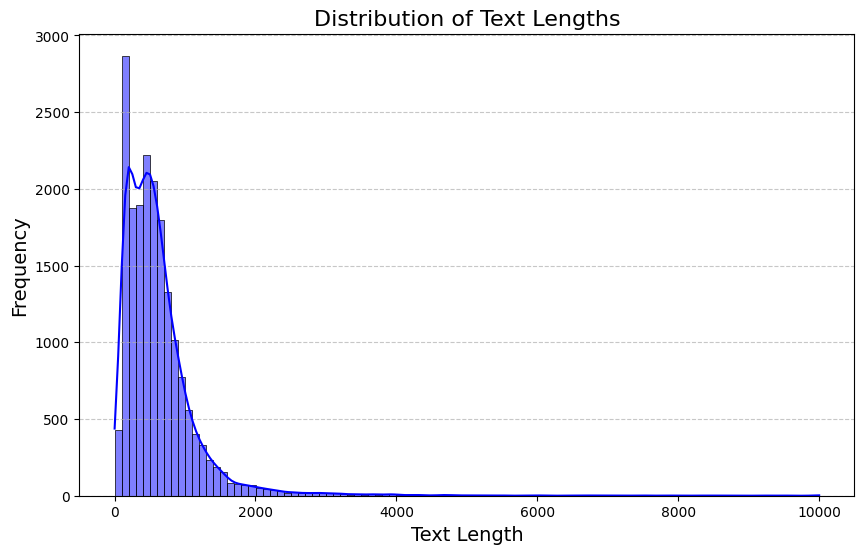

In [7]:
# Calculate lengths of 'alltext'
df['text_length'] = df['alltext'].str.len()

# Plot distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=100, kde=True, color='blue')
plt.title('Distribution of Text Lengths', fontsize=16)
plt.xlabel('Text Length', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [9]:
new_df = df[df["text_length"] > 6000]
len(new_df)

31

In [11]:
display(new_df["id"])

1775     17601
4932     16574
5423     13746
5694     13520
6231     16674
6406     12777
6776     12417
6915     16560
6977     12257
7102     12148
8016     11850
9144      9940
9201      9882
9224      9866
11461     7282
11924     7040
12079     6886
12173     6783
12246     6823
12568    17065
12625     6316
13514     6198
13847     6258
14639    11219
14640    11220
14670     6487
14793     6208
17629     4111
18531     2810
18720      298
18757     5632
Name: id, dtype: object